# Script for Data preparation, Model Calibration and Validation
Prerequisites: data has been downloaded, e.g. via execution of exporation.ipybn

In [3]:
%matplotlib inline
import pandas as pd
import sklearn as sl
data = pd.read_csv('c:\\dev\\bike\\data\\hour.csv')

## Attribute Selection

In [4]:
irrelevant_attributes = ['instant', # detached
                         'dteday', # mostly redundant
                         'holiday', # redundant
                         'casual', 'registered' # not in scope
                        ]
attributes = [a for a in d.columns if a not in irrelevant_attributes]

## Data Preparation

In [7]:
target = 'cnt'
features = [a for a in data.columns.values if a!=target]

X, Y = sl.utils.shuffle(data[features].values, data[target].values)
print('dimension of model input X', X.shape, X.dtype)
print('dimension of model output Y', Y.shape, Y.dtype)

dimension of model input X (17379, 16) object
dimension of model output Y (17379,) int64


## Model: Gradient Boost Trees

In [14]:
def model_assessment(model):
    print(model)
    model.fit(X,Y)
    Y_p = model.predict(X)
    print(' In sample errors\n    mean', mean_absolute_error(Y_p, Y),
          '\n    median', median_absolute_error(Y_p, Y))
    scores = sl.model_selection.cross_val_score(model, X, Y, cv=10,
                                                scoring= 'neg_mean_absolute_error')
    print(' Out of sample errors\n    cv mean:', abs(scores.mean()),
          '\n    cv mean std ', scores.std())
    return abs(scores.mean())   

In [275]:
# An manual search through the hyper-parameter space lead to the following settings:
n_estimators= 150
max_depth = 7
model_candidate = sl.ensemble.GradientBoostingRegressor(n_estimators= n_estimators,
                                                        max_depth = max_depth)
model_assessment(model_candidate);

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
 In sample errors
    mean 17.2443776611647 
    median 10.35799522969532
 Out of sample errors
    cv mean: 23.89098608376787 
    cv mean std  0.8330092756884441


##  Desciption of the Model Choice

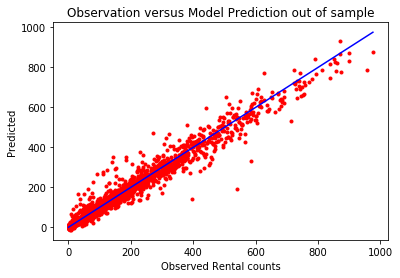

In [274]:
import matplotlib.pyplot as plt
def plot_prediction_vs_observation(model):
    n = round(.1 * len(Y))
    X_train, Y_train, X_test, Y_test = X[n:], Y[n:], X[:n], Y[:n]
    model.fit(X_train, Y_train)
    Y_p = model.predict(X_test)
    p = Y_test.argsort()
    plt.plot(Y_test[p], Y_predict_test[p],'r.', Y_test[p], Y_test[p], 'b');
    plt.title('Observation versus Model Prediction out of sample');
    plt.xlabel('Observed Rental counts'); plt.ylabel('Predicted');
    
plot_prediction_vs_observation(model_candidate)

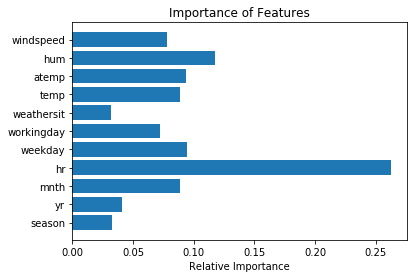

In [233]:
plt.barh(features, treeBooster.feature_importances_);
plt.title('Importance of Features'); plt.xlabel('Relative Importance');